In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Συναρτήσεις δημιουργίας όλων των High Pass φίλτρων και των αποκρίσεων τους σε εικόνα

In [ ]:

def apply_filters(image):
    # 1st order (Sobel)
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    # 2nd order (Laplacian)
    laplacian = np.array([[0,  1, 0],
                         [1, -4, 1],
                         [0,  1, 0]])

    # Results
    grad_x = cv2.filter2D(image, -1, sobel_x)
    grad_y = cv2.filter2D(image, -1, sobel_y)
    first_order = np.sqrt(grad_x**2 + grad_y**2)

    second_order = cv2.filter2D(image, -1, laplacian)

    return first_order, second_order

## Συνάρτηση ενίσχυσης περιοχών υψηλών συχνοτήτων εικόνας

In [ ]:
def enhance_image_details(image, method='first_order', strength=1.0):
    if method == 'first_order':
        # Sobel operators
        sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
        sobel_y = sobel_x.T

        # Apply filters
        grad_x = cv2.filter2D(image, -1, sobel_x)
        grad_y = cv2.filter2D(image, -1, sobel_y)

        # Combine gradients
        enhancement = np.sqrt(grad_x**2 + grad_y**2)

    else:  # second_order
        # Laplacian
        laplacian = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

        # Apply filter
        enhancement = cv2.filter2D(image, -1, laplacian)

    # Enhance original image
    enhanced = np.clip(image + strength * enhancement, 0, 255)
    return enhanced.astype(np.uint8)

## Παράδειγμα εφαρμογής φίλτρων

## Σύγκριση πάχους ακμών με χρήση φίλτρων 1ης και 2ης τάξης

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

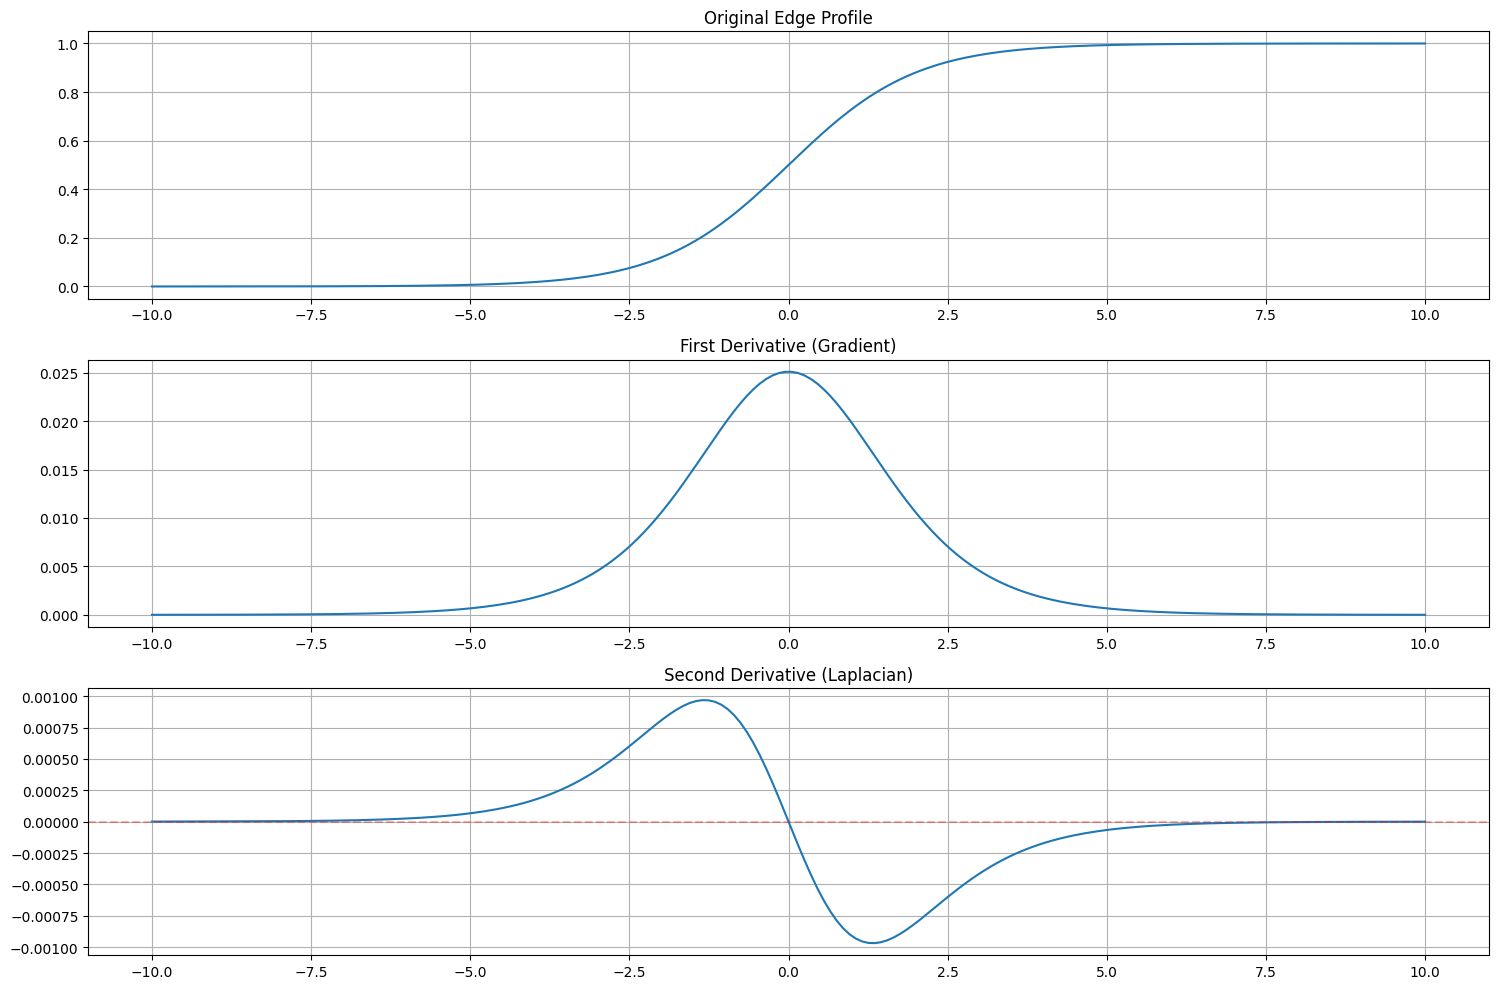

In [ ]:
def create_edge_profile():
    # Create a smoothed step edge
    x = np.linspace(-10, 10, 200)
    edge = 1 / (1 + np.exp(-x))  # Sigmoid function for smooth edge

    # Calculate derivatives
    first_derivative = np.gradient(edge)
    second_derivative = np.gradient(first_derivative)

    # Plotting
    plt.figure(figsize=(15, 10))

    # Original signal
    plt.subplot(311)
    plt.plot(x, edge)
    plt.title('Original Edge Profile')
    plt.grid(True)

    # First derivative
    plt.subplot(312)
    plt.plot(x, first_derivative)
    plt.title('First Derivative (Gradient)')
    plt.grid(True)

    # Second derivative
    plt.subplot(313)
    plt.plot(x, second_derivative)
    plt.title('Second Derivative (Laplacian)')
    plt.grid(True)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

    plt.tight_layout()
    return plt

# Create and display the plot
create_edge_profile()

### Παράδειγμα υπολογισμού πάχους

In [5]:
def demonstrate_edge_thickness():
    # Create a simple test image with a clean edge
    image = np.zeros((100, 100))
    image[40:60, 40:60] = 1

    # Apply Gaussian smoothing to make it more realistic
    image = cv2.GaussianBlur(image, (5, 5), 1)

    # First-order (Sobel)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    first_order = np.sqrt(sobel_x**2 + sobel_y**2)

    # Second-order (Laplacian)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Zero-crossing detection for Laplacian
    zero_crossings = np.zeros_like(laplacian)
    for i in range(1, laplacian.shape[0]-1):
        for j in range(1, laplacian.shape[1]-1):
            if (laplacian[i,j] * laplacian[i+1,j] < 0) or \
               (laplacian[i,j] * laplacian[i,j+1] < 0):
                zero_crossings[i,j] = 1

    return image, first_order, laplacian, zero_crossings

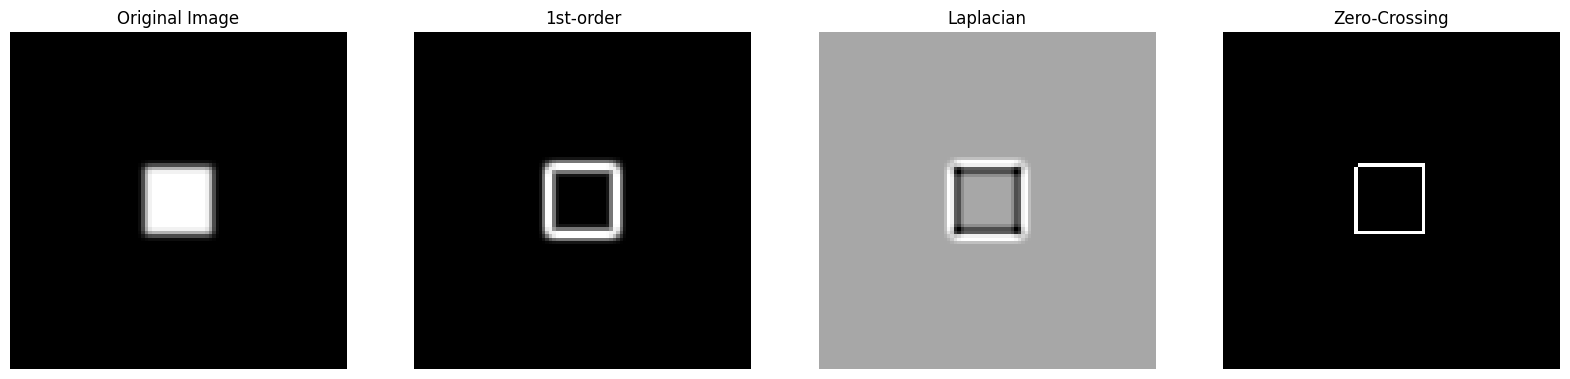

In [9]:
image, first_order, laplacian, zero_crossing = demonstrate_edge_thickness()

plt.figure(figsize=(20, 5))

# Plot original
plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot 1st order
plt.subplot(142)
plt.imshow(first_order, cmap='gray')
plt.title('1st-order')
plt.axis('off')

# Plot Laplacian
plt.subplot(143)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

# Plot zero-crossing
plt.subplot(144)
plt.imshow(zero_crossing, cmap='gray')
plt.title('Zero-Crossing')
plt.axis('off')

plt.show()
